## Problem Statement:

Use Classification techniques to predict the Heart Disease
Classification:

*This process of looking at features and putting things into groups is what we call "classification." It's like a fun game of sorting based on what we know about different things!*

*For example, if they see a red, round fruit, they'll say, "It's an apple!" If they see an orange, bumpy fruit, they'll say, "It's an orange!" And if they see a yellow, long, curved fruit, they'll say, "It's a banana!"*

*So, classification is just a way of sorting things into groups based on what we can see or learn about them. It's a cool and helpful technique that both us and computers can use to organize and understand the world around us!*

## 1. Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load Data

In [3]:
df = pd.read_csv('dataset.csv')

### Column Descriptions:
**id**  : (Unique id for each patient)    
**age**  : (Age of the patient in years)     
**origin**  : (place of study)   
**sex** : (Male/Female)   
**cp** : chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])    
**trestbps** : resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))   
**chol** : (serum cholesterol in mg/dl)   
**fbs** : (if fasting blood sugar > 120 mg/dl)   
**restecg** : (resting electrocardiographic results)   
-- Values: [normal, stt abnormality, lv hypertrophy]    
**thalach**: maximum heart rate achieved    
**exang**: exercise-induced angina (True/ False     
**oldpeak**: ST depression induced by exercise relative to rest    
**slope**: the slope of the peak exercise ST segment    
**ca**: number of major vessels (0-3) colored by fluoroscopy   
**thal**: [normal; fixed defect; reversible defect]   
**num**: the predicted attribute   

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print('We have {} rows.'.format(df.shape[0]))
print('We have {} columns'.format(df.shape[1]))
df.iloc[1,:]

We have 303 rows.
We have 14 columns


age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.nunique()       # prints the count of number of unique elements in each column

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
df.duplicated().sum()            # prints number of duplicated value in eacch column

1

In [9]:
df.isnull().sum()                # check whether null values present in any column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

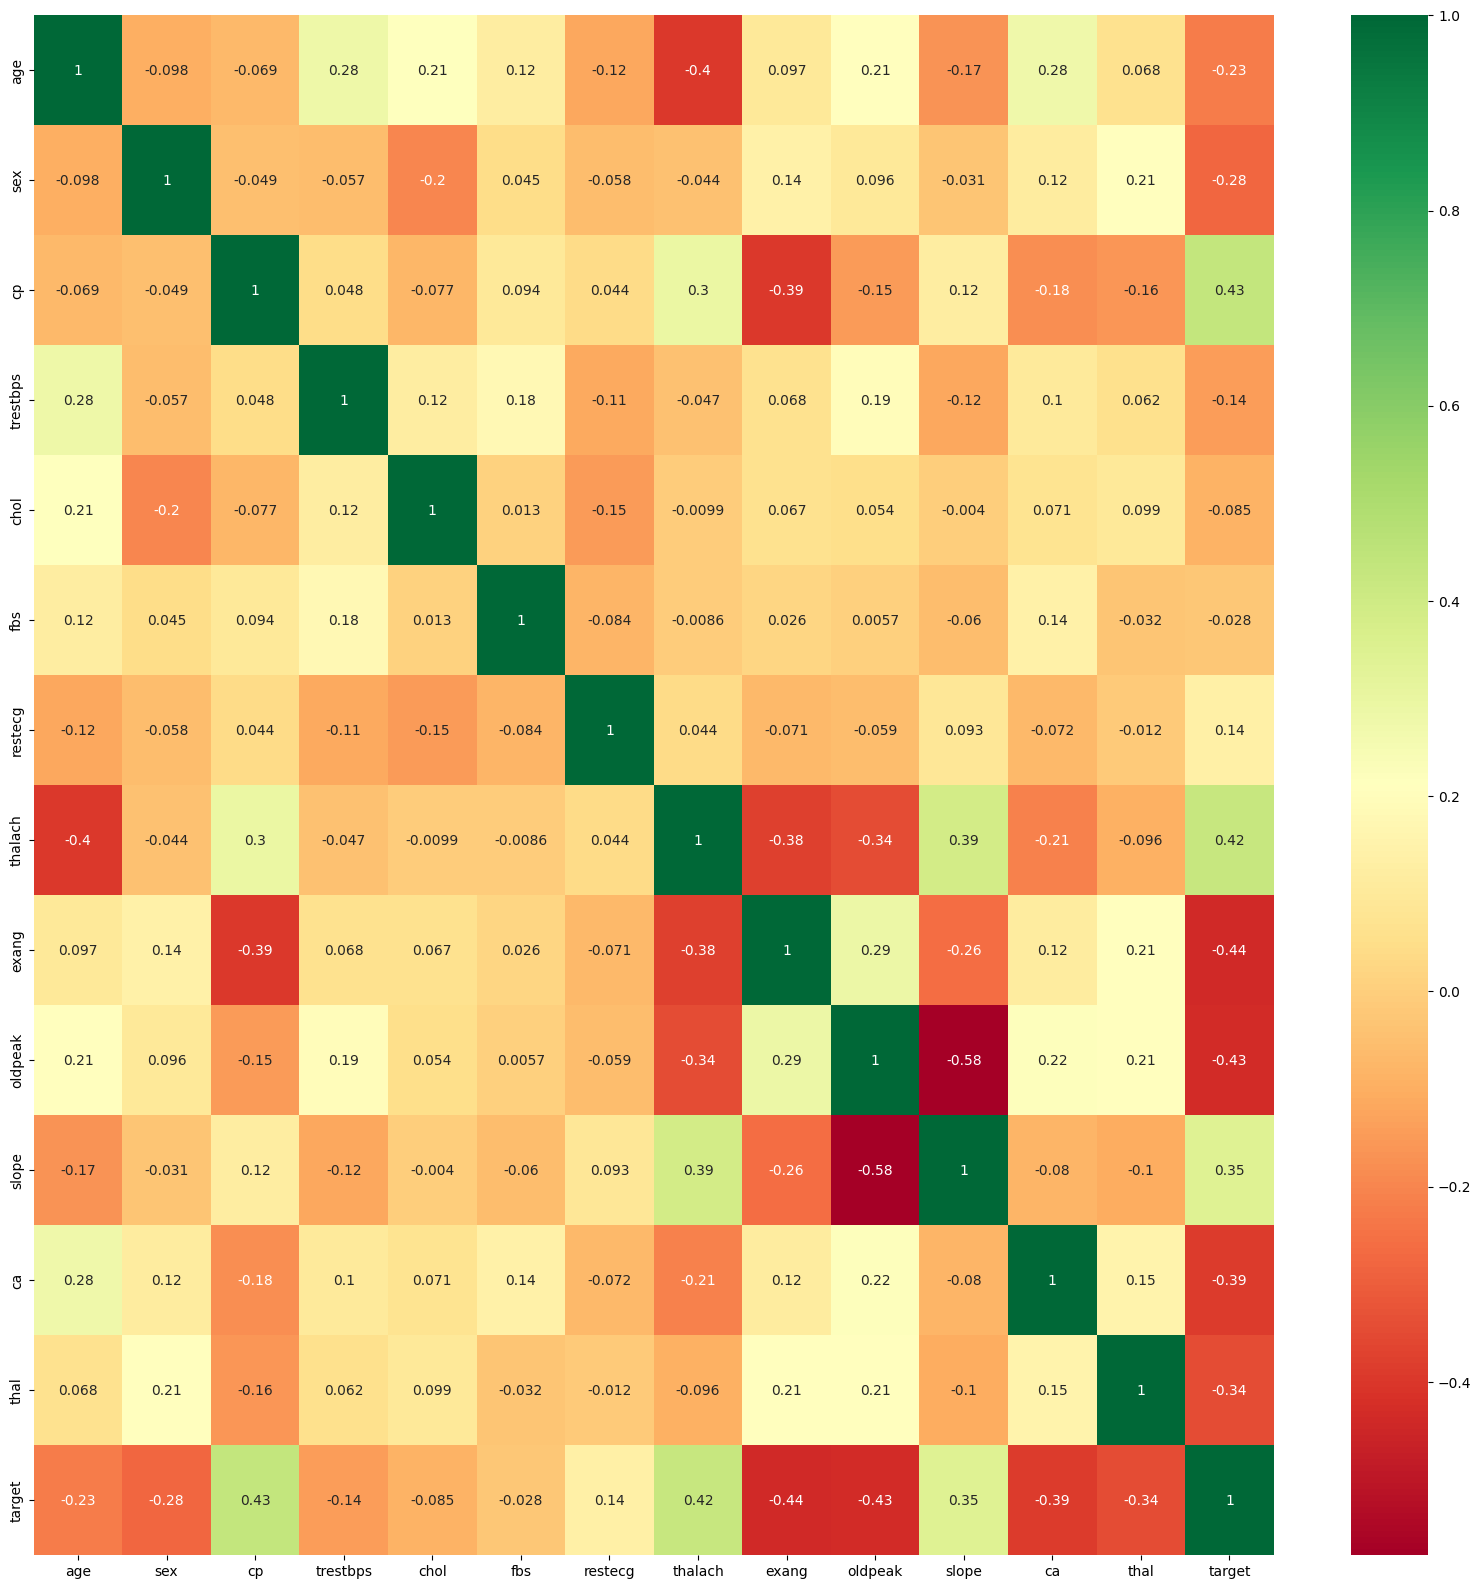

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: xlabel='target', ylabel='count'>

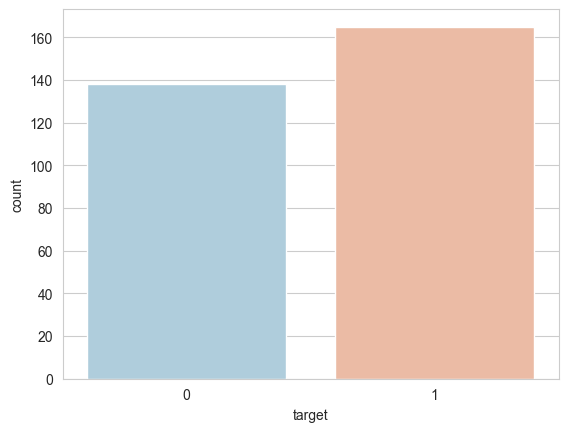

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

## Data transforamtion

In [12]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [14]:
dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


## Data preparation

In [15]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [31]:
# divide train test: 70 % - 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Modeling

## Using Knn

In [69]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

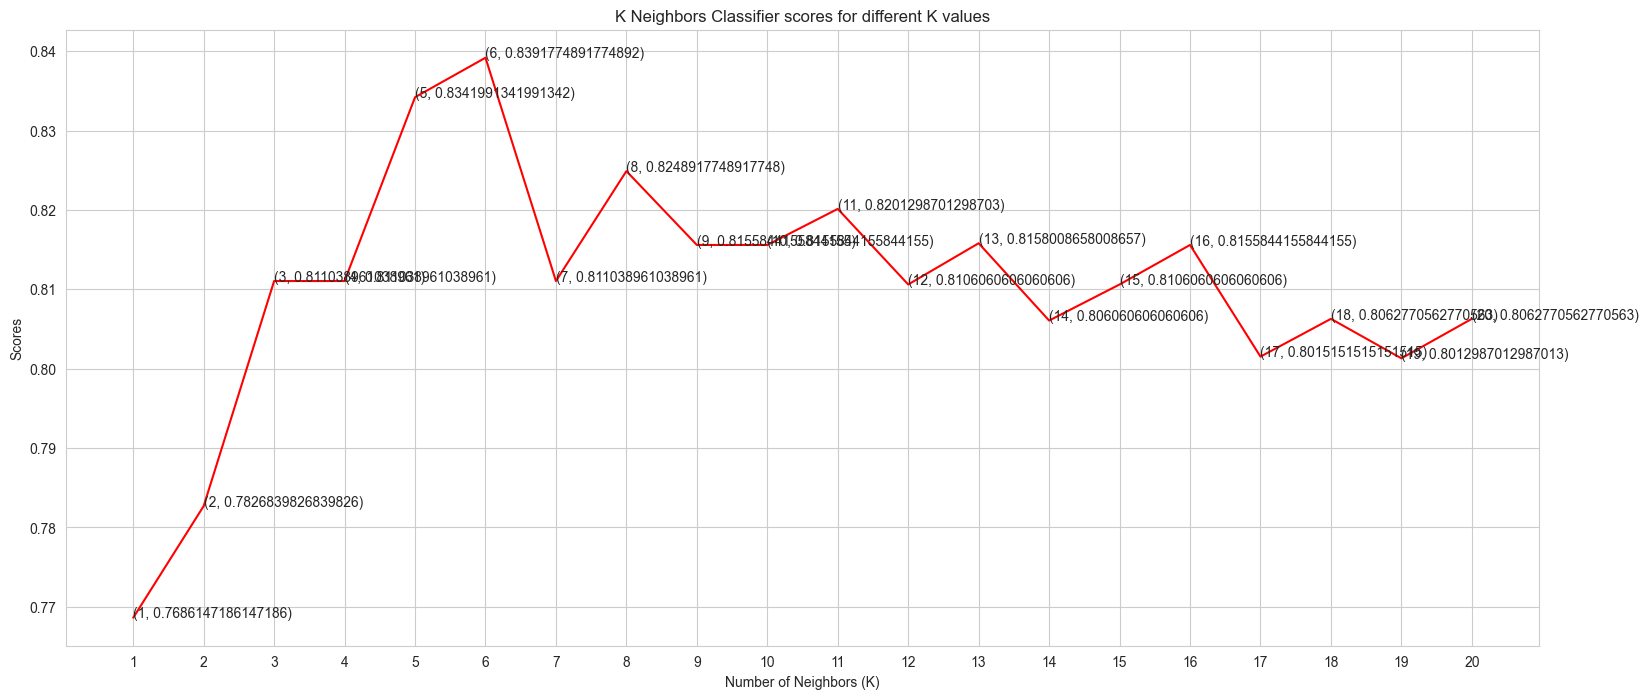

In [70]:
plt.figure(figsize=(19, 8))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')


for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))


plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [71]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)

In [72]:
score.mean()

0.8106060606060606

In [90]:
X_train.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [91]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
124,-1.694735,-2.148802,-0.913400,1.283627,-0.896862,True,False,False,False,True,...,True,True,False,False,False,False,False,False,True,False
72,-2.797624,-0.092738,-0.816773,2.289429,-0.896862,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
15,-0.481558,-0.663867,-0.526890,0.365287,0.483451,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
10,-0.040403,0.478391,-0.140381,0.452748,0.138373,False,True,True,False,False,...,True,True,False,False,False,False,False,False,True,False
163,-1.805024,0.364165,-1.377212,1.021244,-0.896862,False,True,False,False,True,...,True,False,False,False,False,True,False,False,True,False


In [92]:
X_train.shape

(212, 30)

In [73]:

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [74]:
from sklearn.metrics import accuracy_score, classification_report

In [75]:
# Model Evaluation
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



## Using RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X_train,y_train,cv=10)

In [77]:
score

array([0.81818182, 0.77272727, 0.71428571, 0.80952381, 0.66666667,
       0.76190476, 0.80952381, 0.95238095, 0.76190476, 0.71428571])

In [78]:
score.mean()

0.7781385281385281

In [79]:
randomforest_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [80]:
# Model Evaluation
y_pred1 = randomforest_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8351648351648352
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



## Using Grid-SearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}



# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [59]:
grid_search.best_score_

0.839622641509434

In [60]:
rf_best = grid_search.best_estimator_
rf_best


RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [61]:
rf_best.feature_importances_

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
28,thal_2,0.136574
21,ca_0,0.135111
7,cp_0,0.111420
29,thal_3,0.098896
16,exang_0,0.091010
3,thalach,0.073316
17,exang_1,0.066862
4,oldpeak,0.064931
20,slope_2,0.042722
19,slope_1,0.038396


In [62]:
final_model=RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)


In [63]:
final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [65]:
# Model Evaluation
y_pred2 = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



## Using Decision Tree

In [49]:
#initialize model
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
# Model Evaluation
y_pred3 = dectree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7802197802197802
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.81      0.78      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



## model performance

Decision_tree : 0.7802197802197802     
Random_forest : 0.8351648351648352   
Knn_algorithm :  0.8571428571428571               # highest  
using_Gridsearch : 0.8461538461538461       

As we can can observe that KNN-algo has highest accuracy but we have high recall value using Grid_search params using random forest and it is reliable due its bagging concept .

## Creating pickle file

In [83]:
import pickle

In [88]:
# Save the trained model to a pickle file
with open('chd_model_knn_classifier.pkl', 'wb') as file:
    pickle.dump(knn_classifier, file)


In [85]:
import joblib

In [87]:
joblib.dump(final_model, 'heart_disease_model.joblib')


['heart_disease_model.joblib']